Classifying newswires: a multiclass classification example

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
print(len(train_data))
len(test_data)

8982


2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]]) 

550378/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)            
x_test = vectorize_sequences(test_data)              

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)        
one_hot_test_labels = to_one_hot(test_labels) 

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 71ms/step - loss: 2.7500 - accuracy: 0.4395 - val_loss: 1.8206 - val_accuracy: 0.6120
Epoch 2/20
16/16 [==============================] - 1s 66ms/step - loss: 1.5621 - accuracy: 0.6746 - val_loss: 1.4108 - val_accuracy: 0.6930
Epoch 3/20
16/16 [==============================] - 1s 85ms/step - loss: 1.2178 - accuracy: 0.7284 - val_loss: 1.2205 - val_accuracy: 0.7220
Epoch 4/20
16/16 [==============================] - 1s 74ms/step - loss: 1.0006 - accuracy: 0.7841 - val_loss: 1.1117 - val_accuracy: 0.7450
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8353 - accuracy: 0.8213 - val_loss: 1.0332 - val_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6998 - accuracy: 0.8480 - val_loss: 0.9623 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5868 - accuracy: 0.8750 - val_loss: 0.9216 - val_accuracy: 0.8060
Epoch 8/20
16

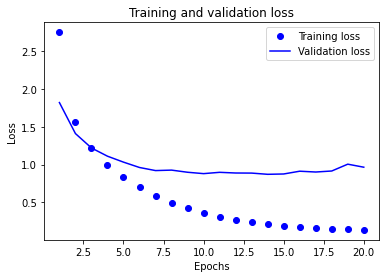

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

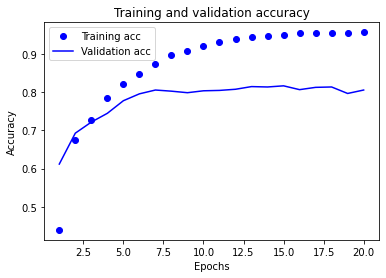

In [ ]:
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 3s 66ms/step - loss: 2.7503 - accuracy: 0.4816 - val_loss: 1.8564 - val_accuracy: 0.5990
Epoch 2/9
16/16 [==============================] - 1s 51ms/step - loss: 1.5792 - accuracy: 0.6696 - val_loss: 1.4342 - val_accuracy: 0.6830
Epoch 3/9
16/16 [==============================] - 1s 48ms/step - loss: 1.2174 - accuracy: 0.7435 - val_loss: 1.2264 - val_accuracy: 0.7250
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.9935 - accuracy: 0.7871 - val_loss: 1.1002 - val_accuracy: 0.7510
Epoch 5/9
16/16 [==============================] - 1s 51ms/step - loss: 0.8289 - accuracy: 0.8200 - val_loss: 1.0235 - val_accuracy: 0.7710
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.6888 - accuracy: 0.8480 - val_loss: 0.9606 - val_accuracy: 0.7800
Epoch 7/9
16/16 [==============================] - 1s 50ms/step - loss: 0.5755 - accuracy: 0.8720 - val_loss: 0.9093 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [ ]:
results

[0.9845177531242371, 0.7729296684265137]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19056099732858414

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 6ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 3.2820 - accuracy: 0.2129 - val_loss: 2.9077 - val_accuracy: 0.2630
Epoch 2/20
63/63 [==============================] - 1s 23ms/step - loss: 2.6047 - accuracy: 0.2881 - val_loss: 2.4250 - val_accuracy: 0.3140
Epoch 3/20
63/63 [==============================] - 2s 28ms/step - loss: 1.9842 - accuracy: 0.4044 - val_loss: 1.7456 - val_accuracy: 0.6230
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.3830 - accuracy: 0.6630 - val_loss: 1.4475 - val_accuracy: 0.6500
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1771 - accuracy: 0.6847 - val_loss: 1.3768 - val_accuracy: 0.6660
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0560 - accuracy: 0.7345 - val_loss: 1.3583 - val_accuracy: 0.6910
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.9611 - accuracy: 0.7592 - val_loss: 1.3573 - val_accuracy: 0.6930
Epoch 8/20
63

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 5ms/step


In [ ]:
results

[0.9845177531242371, 0.7729296684265137]